Attmepting to compute julia set and fatou basins separately.

In [543]:
import numpy as np
import matplotlib.pyplot as plt

In [544]:
f = lambda x, c: x*x + c
c = -1
# c = -0.75 + 0.11j
# c = -0.835 - 0.321j
# c = 0.3887 - 0.2158j
res = 500
max_iter = 3000
xlim = 2
ylim = 2
x = np.linspace(-xlim, xlim, res)
y = np.linspace(-ylim, ylim, res)
X,Y = np.meshgrid(x,y)
Z = X + Y*1j

In [545]:
disc = 1 - 4*c
p1 = (1 + np.sqrt(disc)) / 2
p2 = (1 - np.sqrt(disc)) / 2

if abs(2*p1) < 1:
    p = p1
elif abs(2*p2) < 1:
    p = p2
else:
    p = None 

In [546]:
bas0 = np.full(Z.shape,max_iter, dtype=int)
basInfty = np.full(Z.shape, max_iter, dtype=int)
basInfty2 = np.full(Z.shape, max_iter, dtype=int)
Z20 = Z.copy()
Z2I = Z.copy()

In [547]:
for i in range(max_iter):
    bas0radius = np.abs(Z20 - p) >= 1e-6
    Z20[bas0radius] = f(Z20[bas0radius],c)
    just_escaped0 = (bas0 == max_iter ) & ((np.abs(Z20 - p) < 1e-6)) #bas0 ==max_iter condition means we havent already overwirtten the max_iter initial value #~ is bitwise NOT operator
    bas0[just_escaped0]  = i #+ 1 - np.log(np.log(np.abs(Z20[just_escaped0])))/np.log(2)

    basInftyradius = np.abs(Z2I) <= 100*max_iter # may need to change this to some arbitrary large value. Must be greater than max_iter though, otehrwise points may escape prematurely
    Z2I[basInftyradius] = f(Z2I[basInftyradius],c)
    just_escapedI = (basInfty == max_iter) & (~basInftyradius) 
    basInfty[just_escapedI] = i
    basInfty2[just_escapedI] = i + 1 - np.log(np.log(np.abs(Z2I[just_escapedI])))/np.log(2)

#bas0 matrix
bas0Matrix = bas0.copy()
JuliaSet = (bas0 == max_iter).astype(int) #add second condition for basInfty later '& (basInfty ==max_iter)'
JuliaSet[bas0Matrix != max_iter] = 0

basInftyMatrix = basInfty.copy()
tempfilledJuliaSet = (basInftyMatrix == max_iter).astype(int)
basInftyMatrix[tempfilledJuliaSet == 1] = 0

basInftyMatrix2 = basInfty2.copy()
tempfilledJuliaSet = (basInftyMatrix2 == max_iter).astype(int)
basInftyMatrix2[tempfilledJuliaSet == 1] = 0




TypeError: unsupported operand type(s) for -: 'complex' and 'NoneType'

<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_34798/1196971402.py:3: SyntaxWarning: invalid escape sequence '\i'
  fig.colorbar(imI, ax=ax, label='escape time to $\infty$ ')


Text(0.5, 1.0, 'c=-1')

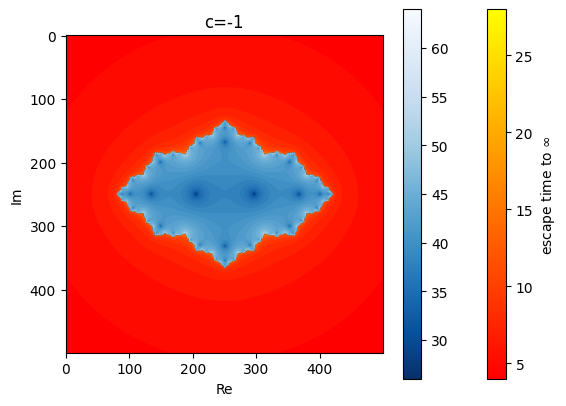

In [548]:
fig, ax = plt.subplots()
imI = ax.imshow(np.ma.masked_where(basInftyMatrix==0,basInftyMatrix),cmap = plt.cm.autumn)
fig.colorbar(imI, ax=ax, label='escape time to $\infty$ ') 
im0 = ax.imshow(np.ma.masked_where(basInftyMatrix!=0,bas0Matrix), cmap=plt.cm.Blues_r) # np.ma.masked_where(basInftyMatrix!=0,bas0Matrix) masks all the points of Bas0 that overlap on non-zero BasInfty points, then plots Bas0 over the BasInfty 0's
fig.colorbar(im0, ax=ax)
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_title(f'c={c}')

<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:12: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:12: SyntaxWarning: invalid escape sequence '\i'
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_34798/1792895627.py:3: SyntaxWarning: invalid escape sequence '\i'
  fig.colorbar(imI, ax=ax[0], label='escape time to $\infty$ ')
/var/folders/t4/ct669w_n77xbhnyp3_zn65480000gn/T/ipykernel_34798/1792895627.py:12: SyntaxWarning: invalid escape sequence '\i'
  fig.colorbar(imI, ax=ax[1], label='escape time to $\infty$ ')


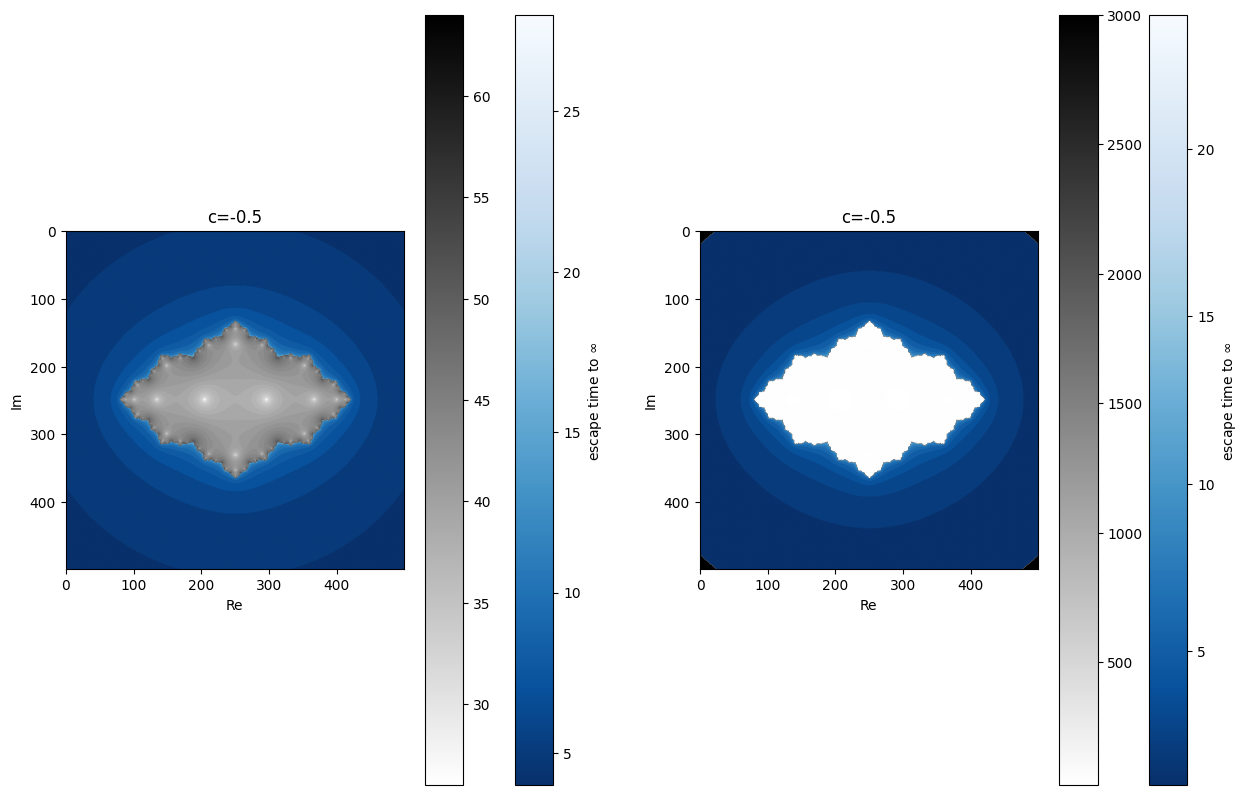

In [ ]:
fig, ax = plt.subplots(ncols=2,  figsize=(15, 10))
imI = ax[0].imshow(np.ma.masked_where(basInftyMatrix==0,basInftyMatrix),cmap = plt.cm.Blues_r)
fig.colorbar(imI, ax=ax[0], label='escape time to $\infty$ ') 
im0 = ax[0].imshow(np.ma.masked_where(basInftyMatrix!=0,bas0Matrix), cmap='binary') # np.ma.masked_where(basInftyMatrix!=0,bas0Matrix) masks all the points of Bas0 that overlap on non-zero BasInfty points, then plots Bas0 over the BasInfty 0's
fig.colorbar(im0, ax=ax[0])
ax[0].set_xlabel('Re')
ax[0].set_ylabel('Im')
ax[0].set_title(f'c={c}')


imI = ax[1].imshow(np.ma.masked_where(basInftyMatrix2==0,basInftyMatrix2),cmap = plt.cm.Blues_r)
fig.colorbar(imI, ax=ax[1], label='escape time to $\infty$ ') 
im0 = ax[1].imshow(np.ma.masked_where(basInftyMatrix2!=0,bas0Matrix), cmap='binary')
fig.colorbar(im0, ax=ax[1])
ax[1].set_xlabel('Re')
ax[1].set_ylabel('Im')
ax[1].set_title(f'c={c}')
plt.show()